In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,...,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,...,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,...,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,...,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,...,8.41,10.1,3,2.73,3,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C4A4B9088>,
      dtype=object)

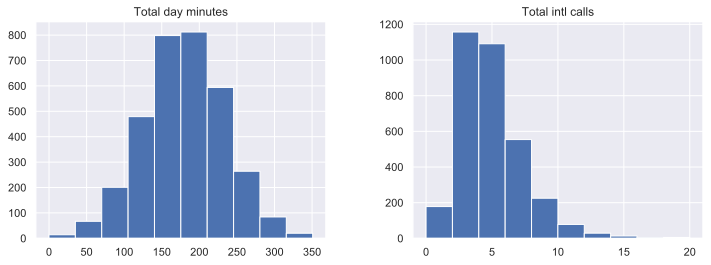

In [8]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(12, 4))

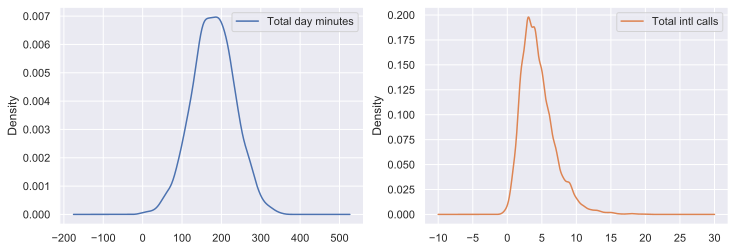

In [15]:
df[features].plot(kind='density', subplots=True, #разъеденяет
                  layout=(1, 2), sharex=False,#одинаковый маштаб
                  figsize=(12, 4));

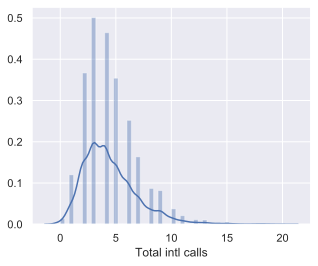

In [16]:
sns.distplot(df['Total intl calls']);

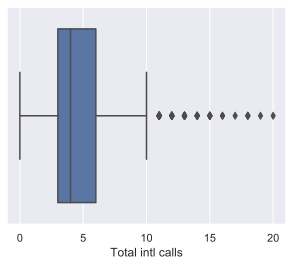

In [22]:
sns.boxplot(df['Total intl calls'])

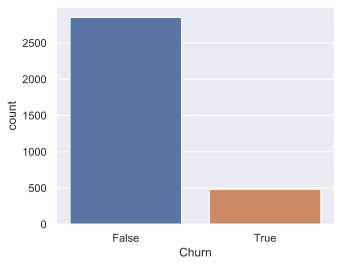

In [36]:
sns.countplot(x='Churn', data=df);

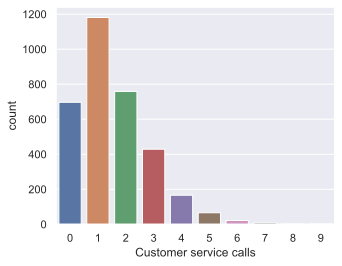

In [37]:
sns.countplot(x='Customer service calls', data=df);

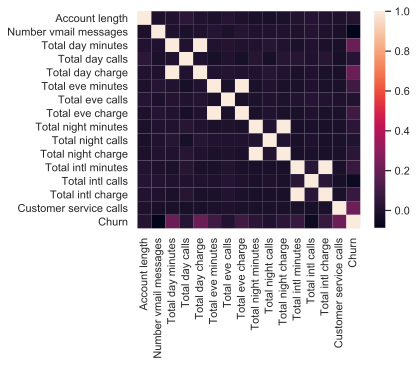

In [43]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()
sns.heatmap(corr_matrix);
# Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.

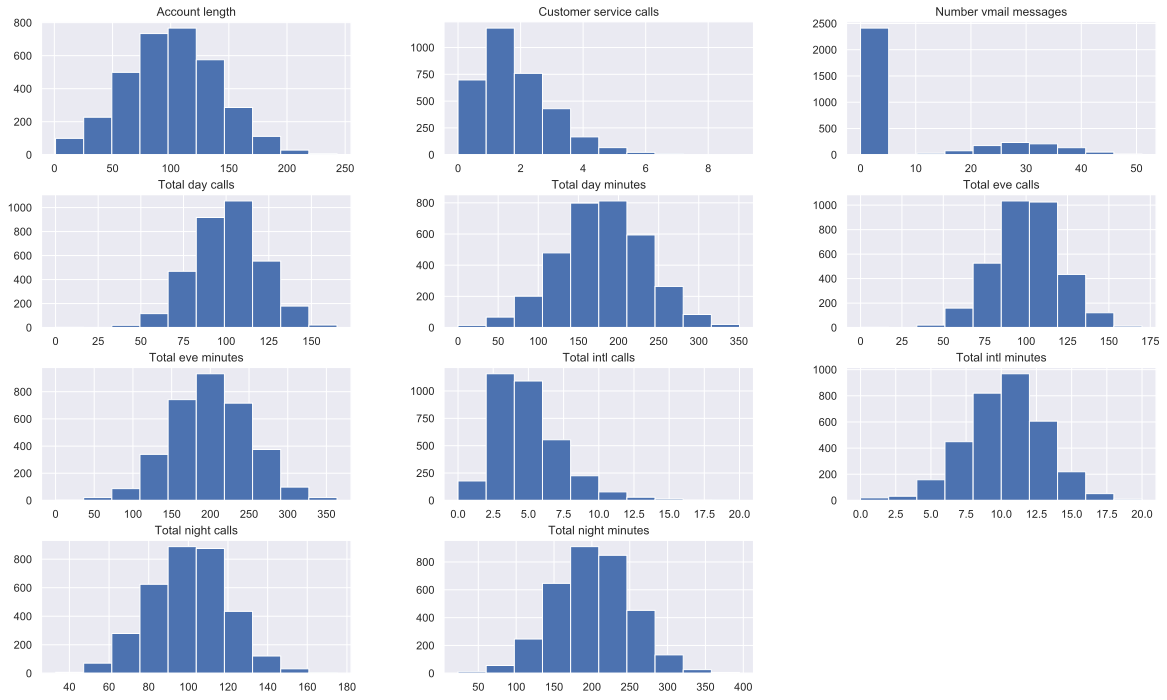

In [46]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

IndexError: index 3 is out of bounds for axis 0 with size 3

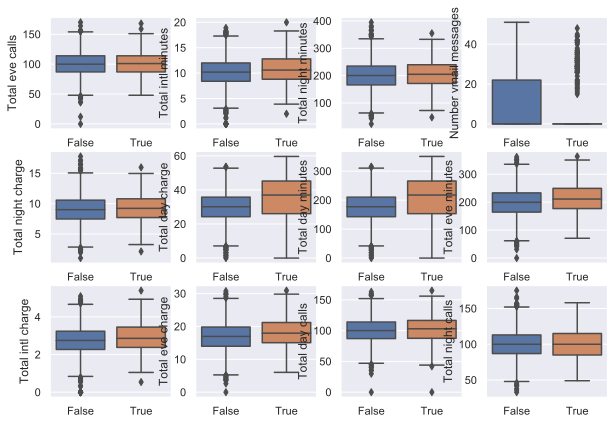

In [48]:
# Sometimes you can analyze an ordinal variable as numerical one
numerical.append('Customer service calls') 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat) 
fig.tight_layout();

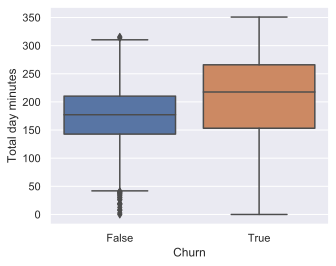

In [51]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);
#sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [56]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

In [57]:
df[df['Churn'] == 0]['Total day minutes'].mean()

175.17575438596492

In [58]:
columns_to_show = ['Total day minutes']
a = df.groupby(['Churn'])[columns_to_show].mean()
print(a)

       Total day minutes
Churn                   
False         175.175754
True          206.914079


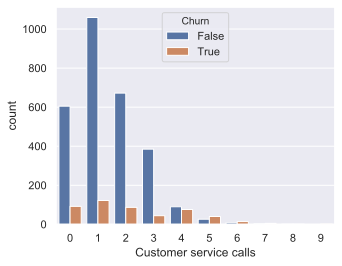

In [59]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

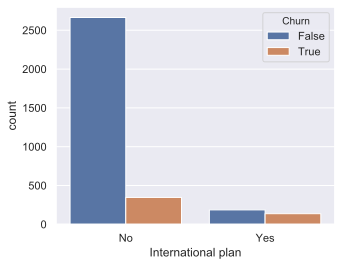

In [60]:
sns.countplot(x='International plan', hue='Churn', data=df);

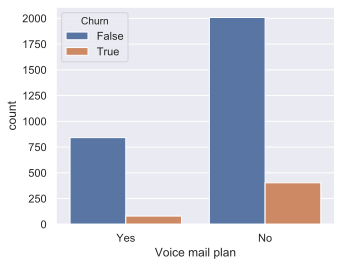

In [61]:
sns.countplot(x='Voice mail plan', hue='Churn', data=df);

In [62]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,...,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,...,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604
